## Portfolio assignment 17
30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [1]:
import pandas as pd
import seaborn as sns

from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor as DTRegressor
from sklearn.model_selection import train_test_split as TTS

import graphviz
import numpy

In [2]:
data = sns.load_dataset('penguins')
data.shape

(344, 7)

In [3]:
data = data.dropna()
data.shape

(333, 7)

### Split dataset

In [4]:
trainset, testset = TTS(data, test_size = 0.3, stratify=data['island'], random_state = 42)
print(trainset.shape, testset.shape)

(233, 7) (100, 7)


### Decision Tree Regressor

In [5]:
dtr = DTRegressor(max_depth = 2)
dtr.fit(trainset[['body_mass_g']], trainset['flipper_length_mm'])

DecisionTreeRegressor(max_depth=2)

### Predictions

In [6]:
predictionsTrain = dtr.predict(trainset[['body_mass_g']])

unique, counts = numpy.unique(predictionsTrain, return_counts = True)
dict(zip(unique, counts))

{190.13274336283186: 113,
 200.18867924528303: 53,
 216.02439024390245: 41,
 223.92307692307693: 26}

In [7]:
predictionsTest = dtr.predict(testset[['body_mass_g']])

unique, counts = numpy.unique(predictionsTest, return_counts = True)
dict(zip(unique, counts))

{190.13274336283186: 47,
 200.18867924528303: 29,
 216.02439024390245: 11,
 223.92307692307693: 13}

### RMSE (Root Mean Square Error)

In [8]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [9]:
predictionsOnTrainset = dtr.predict(trainset[['body_mass_g']])
predictionsOnTestset = dtr.predict(testset[['body_mass_g']])

rmseTrain = calculate_rmse(predictionsOnTrainset, trainset.flipper_length_mm)
rmseTest = calculate_rmse(predictionsOnTestset, testset.flipper_length_mm)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 6.562327069687833
RMSE on test set 7.894854090709093


The RMSE on the test set is much higher compared to the training set. This is probably due to the difference in size of the datasets, for the training set is more than twice the size of the test set. This makes the training set more accurate. 

### Decision Tree

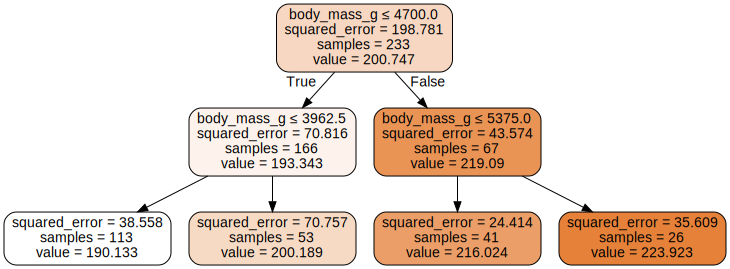

In [19]:
dot_data = tree.export_graphviz(
        dtr,
        out_file = None,
        feature_names = ['body_mass_g'],
        filled = True,
        rounded = True,
        special_characters = True
    )
    
graph = graphviz.Source(dot_data)
    
graph.render('decision_tree')

graph